<a href="https://colab.research.google.com/github/akkinepally/computer_vision_use_cases/blob/main/image_classification_with_ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report


# Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# Exploratory Data Analysis

In [ ]:
def get_the_shape(data, name):
  print("The shape of {} is {}".format(name, data.shape))

get_the_shape(x_train, "x_train")

get_the_shape(y_train, "y_train")

get_the_shape(x_test, "x_test")

get_the_shape(y_test, "y_test")



The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)
The shape of x_test is (10000, 32, 32, 3)
The shape of y_test is (10000, 1)


In [ ]:
y_train[:5]
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

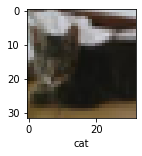

In [ ]:
# plot the images 

def plot_images(x, y, index):
  plt.figure(figsize= (15, 2))
  plt.xlabel(classes[y[index]])
  plt.imshow(x[index])


plot_images(x_train,y_train,9)

# Data Preprocessing 

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

# ANN Model building 


In [ ]:
ann = models.Sequential([
      layers.Flatten(input_shape=(32, 32, 3)), 
      layers.Dense(3000, activation = 'relu'), 
      layers.Dense(1000, activation = 'relu'),
      layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9326 - accuracy: 0.3051
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6415 - accuracy: 0.4200
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5551 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4981 - accuracy: 0.4746
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4397 - accuracy: 0.4912


# Model Evaluation


In [ ]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4521 - accuracy: 0.4787


[1.4521430730819702, 0.47870001196861267]

In [ ]:

y_pred = ann.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred ]

print("Classification report: \n" , classification_report(y_test, y_pred_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.65      0.52      0.58      1000
           2       0.39      0.31      0.35      1000
           3       0.33      0.33      0.33      1000
           4       0.59      0.20      0.30      1000
           5       0.31      0.50      0.38      1000
           6       0.48      0.62      0.54      1000
           7       0.62      0.45      0.52      1000
           8       0.61      0.62      0.62      1000
           9       0.48      0.68      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# CNN Model Building

In [ ]:
cnn = models.Sequential([
                        layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation = 'softmax')
      
])

In [ ]:
cnn.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7456 - accuracy: 0.3705
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2685 - accuracy: 0.5526
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1463 - accuracy: 0.5978
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0638 - accuracy: 0.6277
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0040 - accuracy: 0.6476
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9541 - accuracy: 0.6649
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9077 - accuracy: 0.6840
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8710 - accuracy: 0.6965
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8396 - accuracy: 0.7086
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.804

# CNN Model Evaluation

In [ ]:
cnn.evaluate(x_train, y_train)

1563/1563 [==============================] - 3s 2ms/step - loss: 0.7314 - accuracy: 0.7483


[0.7314090132713318, 0.7483400106430054]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred_class = [np.argmax(element) for element in y_pred ]

print("Classification report: \n" , classification_report(y_test, y_pred_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.74      0.78      0.76      1000
           2       0.54      0.44      0.49      1000
           3       0.43      0.52      0.47      1000
           4       0.55      0.64      0.59      1000
           5       0.62      0.47      0.54      1000
           6       0.68      0.75      0.71      1000
           7       0.73      0.71      0.72      1000
           8       0.73      0.79      0.76      1000
           9       0.75      0.72      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [ ]:
y_test = y_test.reshape(-1,)

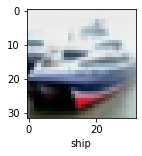

In [ ]:
plot_images(x_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.53885658e-03, 2.59256398e-04, 4.35340172e-03, 8.26749980e-01,
        3.58037371e-03, 4.32348885e-02, 1.86787117e-02, 2.48443626e-04,
        9.97858271e-02, 5.70184086e-04],
       [1.43880001e-03, 3.61144394e-01, 4.56864336e-06, 3.73363969e-06,
        2.57847660e-06, 7.17115469e-08, 2.53924782e-07, 1.25376518e-08,
        6.34851694e-01, 2.55392399e-03],
       [3.87444764e-01, 3.28570977e-02, 6.29346212e-03, 4.36451659e-03,
        2.57425453e-03, 8.32899459e-05, 1.37340641e-04, 2.34131949e-04,
        5.04020870e-01, 6.19903170e-02],
       [4.76973325e-01, 1.72650050e-02, 1.83099106e-01, 4.51956876e-02,
        6.16981350e-02, 7.51932675e-04, 3.93204130e-02, 7.79026712e-04,
        1.66720659e-01, 8.19678698e-03],
       [1.17362795e-07, 7.88635516e-04, 1.85244193e-03, 9.69009623e-02,
        3.92545879e-01, 3.49301822e-03, 5.04352391e-01, 7.08070502e-07,
        5.96201135e-05, 6.22804691e-06]], dtype=float32)

In [ ]:
y_pred_class =  [np.argmax(element) for element in y_pred]
y_pred_class[:5]

[3, 8, 8, 0, 6]

In [ ]:
classes[y_pred_class[1]]

'ship'